In [1]:
import scipy.io
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import MaxAbsScaler, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import itertools
from tensorflow.keras.callbacks import  EarlyStopping
import random

# 기존 train 데이터 불러오기
# [11, 505000, 2]
train_sub_data = scipy.io.loadmat('../datas/160hz/train_5day_160hz.mat', squeeze_me=True)['data']

# 기존 test 데이터 불러오기
# [11, 101402, 2]
test_sub_data = scipy.io.loadmat('../datas/160hz/test_6day_160hz(2).mat', squeeze_me=True)['data']

# # 데이터를 480(= 160*3) 크기로 사용할 수 있도록 그 배수로 전체 데이터 잘라줌
data_cut_size = 504960 # 480*1052 = 504960
test_cut_size = 101280 # 480*211 = 101280

# 트레인 sub 수
train_sub_cnt = train_sub_data.shape[0]
# test 데이터 sub 수
test_sub_cnt = test_sub_data.shape[0]

# sub_cnt = train_sub_cnt + public_sub_cnt

train_sub_cut = train_sub_data[:, 0:data_cut_size, :]
test_sub_cut = test_sub_data[:, 0:test_cut_size, :]

print(train_sub_cut.shape)
print(test_sub_cut.shape)

# 데이터를 스케일링 하기 위해 2D로 reshape
train_sub_2D = train_sub_cut.reshape(-1, 1)
test_2D = test_sub_cut.reshape(-1, 1)

# 데이터를 StandardScaler로 스케일링
# 데이터들 모두 같은 방식으로 스케일링함
SDscaler = StandardScaler()
SDscaler.fit(train_sub_2D)
train_scaled = SDscaler.transform(train_sub_2D)
test_scaled = SDscaler.transform(test_2D)

# 데이터 크기를 480로 맞춰줌
# 5554560/480 = 115,72
data_size = 480
train_sub_size = 1052 # 1명당 3초 데이터 1052개
test_sub_size = 211

train_data = train_scaled.reshape(train_sub_cnt * train_sub_size, data_size, 2)
test_data = test_scaled.reshape(test_sub_cnt * test_sub_size, data_size, 2)

print(train_data.shape)
print(test_data.shape)

#test data를 sub:other=1:1로 만들기 위해서 각 sub 추출
test_data_each = []
for i in range(test_sub_cnt):
    test_data_each.insert(i, test_data[i*test_sub_size:(i+1)*test_sub_size, :, :])
# print(test_data_each)

#train data를 sub:other=1:1로 만들기 위해서 각 sub 추출
train_data_each = []
for i in range(train_sub_cnt):
    train_data_each.insert(i, train_data[i*train_sub_size:(i+1)*train_sub_size, :, :])
    
print(len(train_data_each))
print(len(test_data_each))

(11, 504960, 2)
(11, 101280, 2)
(11572, 480, 2)
(2321, 480, 2)
11
11


In [2]:
# 평가 지표
test_pre_all = []
conf_mat_all = []
test_loss_all = []
test_acc_all = []
test_sen_all = []
test_spe_all = []
frr_all = []
far_all = []

(4208, 480, 2)
(844, 480, 2)
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 480, 2)]          0         
_________________________________________________________________
conv1d (Conv1D)              (None, 480, 12)           84        
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 160, 12)           0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 160, 30)           1110      
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 53, 30)            0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 53, 64)            5824      
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (No

211/211 [==============================] - 2s 10ms/step - loss: 0.0638 - accuracy: 0.9757
Epoch 62/100
211/211 [==============================] - 2s 10ms/step - loss: 0.0696 - accuracy: 0.9772
Epoch 63/100
211/211 [==============================] - 2s 10ms/step - loss: 0.0432 - accuracy: 0.9863
Epoch 64/100
211/211 [==============================] - 2s 10ms/step - loss: 0.0934 - accuracy: 0.9662
Epoch 65/100
211/211 [==============================] - 2s 10ms/step - loss: 0.0568 - accuracy: 0.9789
Epoch 66/100
211/211 [==============================] - 2s 10ms/step - loss: 0.0557 - accuracy: 0.9810
Epoch 67/100
211/211 [==============================] - 2s 10ms/step - loss: 0.0556 - accuracy: 0.9792
Epoch 68/100
211/211 [==============================] - 2s 10ms/step - loss: 0.0669 - accuracy: 0.9803
Epoch 69/100
211/211 [==============================] - 2s 10ms/step - loss: 0.0849 - accuracy: 0.9706
Epoch 70/100
211/211 [==============================] - 2s 10ms/step - loss: 0.1317 - 

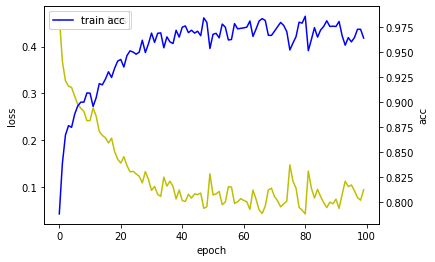

27/27 - 0s - loss: 0.2163 - accuracy: 0.9325
[[615  18]
 [ 39 172]]

 [633 211]
sensitivity :  0.8151658767772512
specificity :  0.9715639810426541
frr :  0.1848341232227488
far :  0.02843601895734597


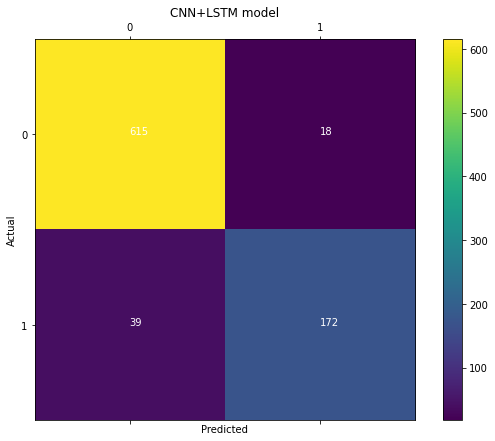

(4208, 480, 2)
(844, 480, 2)
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 480, 2)]          0         
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 480, 12)           84        
_________________________________________________________________
max_pooling1d_3 (MaxPooling1 (None, 160, 12)           0         
_________________________________________________________________
conv1d_4 (Conv1D)            (None, 160, 30)           1110      
_________________________________________________________________
max_pooling1d_4 (MaxPooling1 (None, 53, 30)            0         
_________________________________________________________________
conv1d_5 (Conv1D)            (None, 53, 64)            5824      
_________________________________________________________________
max_pooling1d_5 (MaxPooling1 (

211/211 [==============================] - 2s 10ms/step - loss: 0.0455 - accuracy: 0.9832
Epoch 62/100
211/211 [==============================] - 2s 10ms/step - loss: 0.0141 - accuracy: 0.9943
Epoch 63/100
211/211 [==============================] - 2s 10ms/step - loss: 0.0294 - accuracy: 0.9918
Epoch 64/100
211/211 [==============================] - 2s 10ms/step - loss: 0.0534 - accuracy: 0.9778
Epoch 65/100
211/211 [==============================] - 2s 10ms/step - loss: 0.0406 - accuracy: 0.9884
Epoch 66/100
211/211 [==============================] - 2s 10ms/step - loss: 0.0232 - accuracy: 0.9921
Epoch 67/100
211/211 [==============================] - 2s 10ms/step - loss: 0.0084 - accuracy: 0.9980
Epoch 68/100
211/211 [==============================] - 2s 10ms/step - loss: 0.0264 - accuracy: 0.9897
Epoch 69/100
211/211 [==============================] - 2s 10ms/step - loss: 0.0300 - accuracy: 0.9909
Epoch 70/100
211/211 [==============================] - 2s 10ms/step - loss: 0.0304 - 

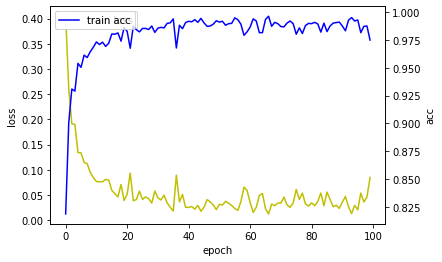

27/27 - 0s - loss: 0.2735 - accuracy: 0.9467
[[628   5]
 [ 40 171]]

 [633 211]
sensitivity :  0.8104265402843602
specificity :  0.9921011058451816
frr :  0.1895734597156398
far :  0.007898894154818325


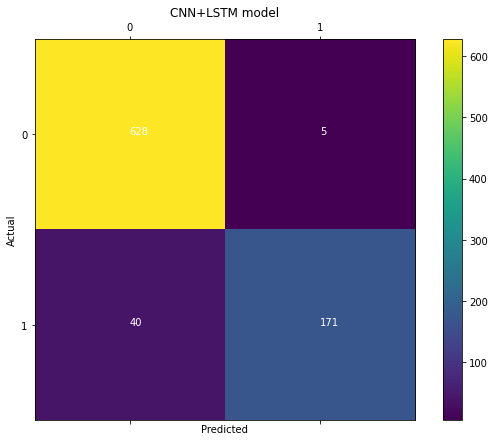

(4208, 480, 2)
(844, 480, 2)
Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 480, 2)]          0         
_________________________________________________________________
conv1d_6 (Conv1D)            (None, 480, 12)           84        
_________________________________________________________________
max_pooling1d_6 (MaxPooling1 (None, 160, 12)           0         
_________________________________________________________________
conv1d_7 (Conv1D)            (None, 160, 30)           1110      
_________________________________________________________________
max_pooling1d_7 (MaxPooling1 (None, 53, 30)            0         
_________________________________________________________________
conv1d_8 (Conv1D)            (None, 53, 64)            5824      
_________________________________________________________________
max_pooling1d_8 (MaxPooling1 (

211/211 [==============================] - 2s 9ms/step - loss: 0.0304 - accuracy: 0.9875
Epoch 62/100
211/211 [==============================] - 2s 9ms/step - loss: 0.0103 - accuracy: 0.9969
Epoch 63/100
211/211 [==============================] - 2s 9ms/step - loss: 0.0150 - accuracy: 0.9957
Epoch 64/100
211/211 [==============================] - 2s 9ms/step - loss: 0.0170 - accuracy: 0.9939
Epoch 65/100
211/211 [==============================] - 2s 10ms/step - loss: 0.0160 - accuracy: 0.9930
Epoch 66/100
211/211 [==============================] - 2s 10ms/step - loss: 0.0589 - accuracy: 0.9797
Epoch 67/100
211/211 [==============================] - 2s 10ms/step - loss: 0.0219 - accuracy: 0.9939
Epoch 68/100
211/211 [==============================] - 2s 10ms/step - loss: 0.0467 - accuracy: 0.9818
Epoch 69/100
211/211 [==============================] - 2s 10ms/step - loss: 0.0405 - accuracy: 0.9873
Epoch 70/100
211/211 [==============================] - 2s 10ms/step - loss: 0.0397 - accu

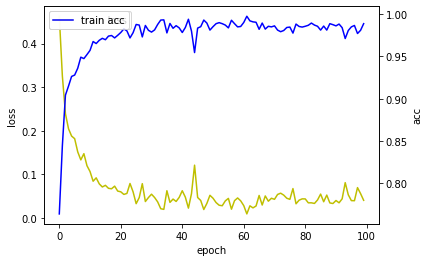

27/27 - 0s - loss: 0.4262 - accuracy: 0.9088
[[610  23]
 [ 54 157]]

 [633 211]
sensitivity :  0.7440758293838863
specificity :  0.9636650868878357
frr :  0.2559241706161137
far :  0.036334913112164295


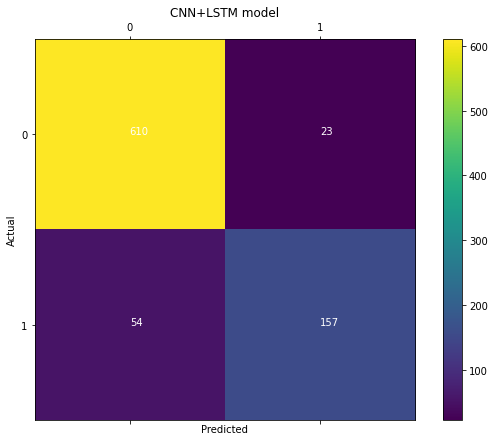

(4208, 480, 2)
(844, 480, 2)
Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 480, 2)]          0         
_________________________________________________________________
conv1d_9 (Conv1D)            (None, 480, 12)           84        
_________________________________________________________________
max_pooling1d_9 (MaxPooling1 (None, 160, 12)           0         
_________________________________________________________________
conv1d_10 (Conv1D)           (None, 160, 30)           1110      
_________________________________________________________________
max_pooling1d_10 (MaxPooling (None, 53, 30)            0         
_________________________________________________________________
conv1d_11 (Conv1D)           (None, 53, 64)            5824      
_________________________________________________________________
max_pooling1d_11 (MaxPooling (

211/211 [==============================] - 2s 10ms/step - loss: 0.0367 - accuracy: 0.9869
Epoch 62/100
211/211 [==============================] - 2s 10ms/step - loss: 0.0319 - accuracy: 0.9884
Epoch 63/100
211/211 [==============================] - 2s 10ms/step - loss: 0.0215 - accuracy: 0.9916
Epoch 64/100
211/211 [==============================] - 2s 10ms/step - loss: 0.0395 - accuracy: 0.9862
Epoch 65/100
211/211 [==============================] - 2s 10ms/step - loss: 0.0542 - accuracy: 0.9840
Epoch 66/100
211/211 [==============================] - 2s 10ms/step - loss: 0.0183 - accuracy: 0.9940
Epoch 67/100
211/211 [==============================] - 2s 9ms/step - loss: 0.0338 - accuracy: 0.9882
Epoch 68/100
211/211 [==============================] - 2s 10ms/step - loss: 0.0318 - accuracy: 0.9886
Epoch 69/100
211/211 [==============================] - 2s 10ms/step - loss: 0.0362 - accuracy: 0.9863
Epoch 70/100
211/211 [==============================] - 2s 9ms/step - loss: 0.0761 - ac

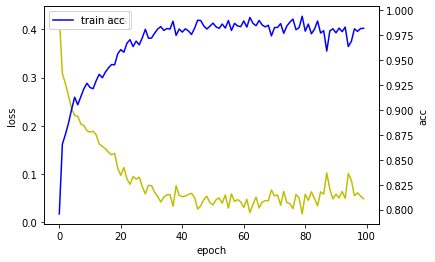

27/27 - 0s - loss: 0.3118 - accuracy: 0.9194
[[595  38]
 [ 30 181]]

 [633 211]
sensitivity :  0.8578199052132701
specificity :  0.9399684044233807
frr :  0.14218009478672985
far :  0.06003159557661927


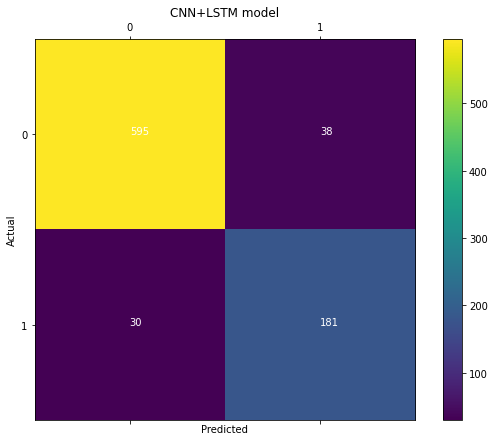

(4208, 480, 2)
(844, 480, 2)
Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 480, 2)]          0         
_________________________________________________________________
conv1d_12 (Conv1D)           (None, 480, 12)           84        
_________________________________________________________________
max_pooling1d_12 (MaxPooling (None, 160, 12)           0         
_________________________________________________________________
conv1d_13 (Conv1D)           (None, 160, 30)           1110      
_________________________________________________________________
max_pooling1d_13 (MaxPooling (None, 53, 30)            0         
_________________________________________________________________
conv1d_14 (Conv1D)           (None, 53, 64)            5824      
_________________________________________________________________
max_pooling1d_14 (MaxPooling (

211/211 [==============================] - 2s 9ms/step - loss: 0.0483 - accuracy: 0.9844
Epoch 62/100
211/211 [==============================] - 2s 10ms/step - loss: 0.0475 - accuracy: 0.9833
Epoch 63/100
211/211 [==============================] - 2s 9ms/step - loss: 0.0764 - accuracy: 0.9722
Epoch 64/100
211/211 [==============================] - 2s 10ms/step - loss: 0.0347 - accuracy: 0.9903
Epoch 65/100
211/211 [==============================] - 2s 10ms/step - loss: 0.0585 - accuracy: 0.9776
Epoch 66/100
211/211 [==============================] - 2s 10ms/step - loss: 0.0387 - accuracy: 0.9844
Epoch 67/100
211/211 [==============================] - 2s 10ms/step - loss: 0.0467 - accuracy: 0.9822
Epoch 68/100
211/211 [==============================] - 2s 10ms/step - loss: 0.0842 - accuracy: 0.9729
Epoch 69/100
211/211 [==============================] - 2s 10ms/step - loss: 0.0612 - accuracy: 0.9824
Epoch 70/100
211/211 [==============================] - 2s 9ms/step - loss: 0.0501 - acc

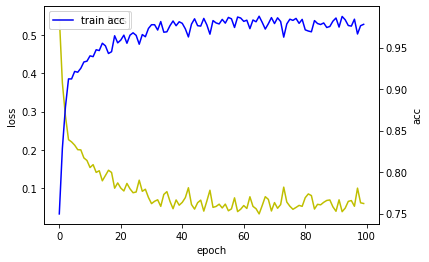

27/27 - 0s - loss: 0.4836 - accuracy: 0.9005
[[616  17]
 [ 67 144]]

 [633 211]
sensitivity :  0.6824644549763034
specificity :  0.9731437598736177
frr :  0.3175355450236967
far :  0.026856240126382307


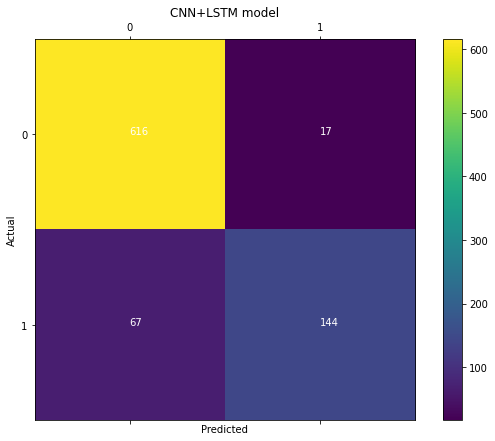

(4208, 480, 2)
(844, 480, 2)
Model: "model_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         [(None, 480, 2)]          0         
_________________________________________________________________
conv1d_15 (Conv1D)           (None, 480, 12)           84        
_________________________________________________________________
max_pooling1d_15 (MaxPooling (None, 160, 12)           0         
_________________________________________________________________
conv1d_16 (Conv1D)           (None, 160, 30)           1110      
_________________________________________________________________
max_pooling1d_16 (MaxPooling (None, 53, 30)            0         
_________________________________________________________________
conv1d_17 (Conv1D)           (None, 53, 64)            5824      
_________________________________________________________________
max_pooling1d_17 (MaxPooling (

211/211 [==============================] - 2s 10ms/step - loss: 0.0312 - accuracy: 0.9883
Epoch 62/100
211/211 [==============================] - 2s 10ms/step - loss: 0.0321 - accuracy: 0.9896
Epoch 63/100
211/211 [==============================] - 2s 10ms/step - loss: 0.0690 - accuracy: 0.9701
Epoch 64/100
211/211 [==============================] - 2s 10ms/step - loss: 0.1107 - accuracy: 0.9650
Epoch 65/100
211/211 [==============================] - 2s 10ms/step - loss: 0.0440 - accuracy: 0.9855
Epoch 66/100
211/211 [==============================] - 2s 10ms/step - loss: 0.0345 - accuracy: 0.9889
Epoch 67/100
211/211 [==============================] - 2s 10ms/step - loss: 0.0368 - accuracy: 0.9873
Epoch 68/100
211/211 [==============================] - 2s 10ms/step - loss: 0.0199 - accuracy: 0.9925
Epoch 69/100
211/211 [==============================] - 2s 10ms/step - loss: 0.0477 - accuracy: 0.9815
Epoch 70/100
211/211 [==============================] - 2s 10ms/step - loss: 0.0200 - 

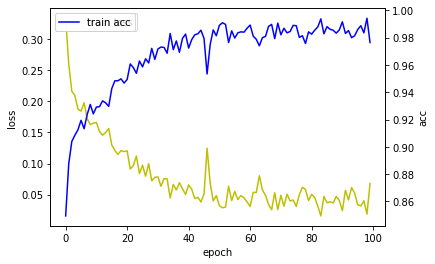

27/27 - 0s - loss: 0.1819 - accuracy: 0.9396
[[617  16]
 [ 35 176]]

 [633 211]
sensitivity :  0.8341232227488151
specificity :  0.9747235387045814
frr :  0.16587677725118483
far :  0.02527646129541864


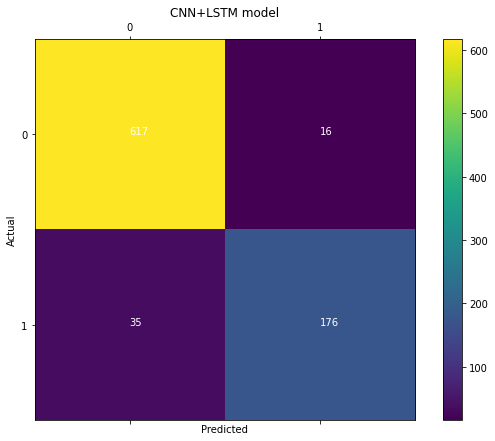

(4208, 480, 2)
(844, 480, 2)
Model: "model_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         [(None, 480, 2)]          0         
_________________________________________________________________
conv1d_18 (Conv1D)           (None, 480, 12)           84        
_________________________________________________________________
max_pooling1d_18 (MaxPooling (None, 160, 12)           0         
_________________________________________________________________
conv1d_19 (Conv1D)           (None, 160, 30)           1110      
_________________________________________________________________
max_pooling1d_19 (MaxPooling (None, 53, 30)            0         
_________________________________________________________________
conv1d_20 (Conv1D)           (None, 53, 64)            5824      
_________________________________________________________________
max_pooling1d_20 (MaxPooling (

211/211 [==============================] - 2s 10ms/step - loss: 0.0948 - accuracy: 0.9635
Epoch 62/100
211/211 [==============================] - 2s 10ms/step - loss: 0.0563 - accuracy: 0.9813
Epoch 63/100
211/211 [==============================] - 2s 10ms/step - loss: 0.0660 - accuracy: 0.9752
Epoch 64/100
211/211 [==============================] - 2s 10ms/step - loss: 0.0558 - accuracy: 0.9806
Epoch 65/100
211/211 [==============================] - 2s 10ms/step - loss: 0.0584 - accuracy: 0.9810
Epoch 66/100
211/211 [==============================] - 2s 10ms/step - loss: 0.0809 - accuracy: 0.9702
Epoch 67/100
211/211 [==============================] - 2s 10ms/step - loss: 0.0455 - accuracy: 0.9830
Epoch 68/100
211/211 [==============================] - 2s 10ms/step - loss: 0.0620 - accuracy: 0.9789
Epoch 69/100
211/211 [==============================] - 2s 10ms/step - loss: 0.0821 - accuracy: 0.9739
Epoch 70/100
211/211 [==============================] - 2s 10ms/step - loss: 0.0971 - 

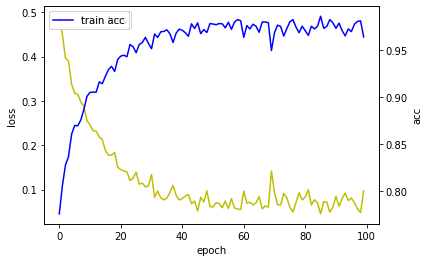

27/27 - 0s - loss: 0.6248 - accuracy: 0.8175
[[552  81]
 [ 73 138]]

 [633 211]
sensitivity :  0.6540284360189573
specificity :  0.8720379146919431
frr :  0.3459715639810427
far :  0.12796208530805686


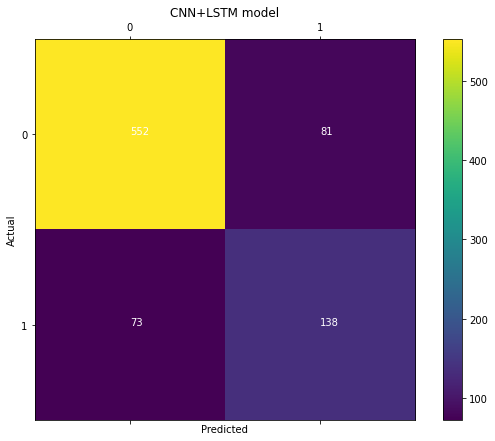

(4208, 480, 2)
(844, 480, 2)
Model: "model_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_8 (InputLayer)         [(None, 480, 2)]          0         
_________________________________________________________________
conv1d_21 (Conv1D)           (None, 480, 12)           84        
_________________________________________________________________
max_pooling1d_21 (MaxPooling (None, 160, 12)           0         
_________________________________________________________________
conv1d_22 (Conv1D)           (None, 160, 30)           1110      
_________________________________________________________________
max_pooling1d_22 (MaxPooling (None, 53, 30)            0         
_________________________________________________________________
conv1d_23 (Conv1D)           (None, 53, 64)            5824      
_________________________________________________________________
max_pooling1d_23 (MaxPooling (

211/211 [==============================] - 2s 10ms/step - loss: 0.0428 - accuracy: 0.9842
Epoch 62/100
211/211 [==============================] - 2s 10ms/step - loss: 0.0438 - accuracy: 0.9823
Epoch 63/100
211/211 [==============================] - 2s 10ms/step - loss: 0.0346 - accuracy: 0.9867
Epoch 64/100
211/211 [==============================] - 2s 10ms/step - loss: 0.0734 - accuracy: 0.9707
Epoch 65/100
211/211 [==============================] - 2s 10ms/step - loss: 0.0429 - accuracy: 0.9876
Epoch 66/100
211/211 [==============================] - 2s 10ms/step - loss: 0.0438 - accuracy: 0.9849
Epoch 67/100
211/211 [==============================] - 2s 10ms/step - loss: 0.0563 - accuracy: 0.9801
Epoch 68/100
211/211 [==============================] - 2s 10ms/step - loss: 0.0684 - accuracy: 0.9765
Epoch 69/100
211/211 [==============================] - 2s 10ms/step - loss: 0.0366 - accuracy: 0.9873
Epoch 70/100
211/211 [==============================] - 2s 10ms/step - loss: 0.0344 - 

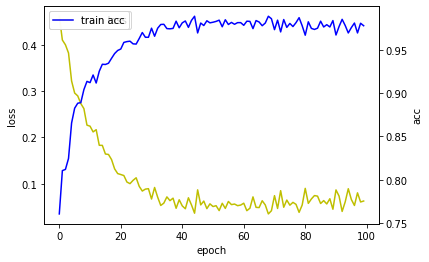

27/27 - 0s - loss: 0.5583 - accuracy: 0.8495
[[559  74]
 [ 53 158]]

 [633 211]
sensitivity :  0.7488151658767772
specificity :  0.8830963665086888
frr :  0.25118483412322273
far :  0.11690363349131122


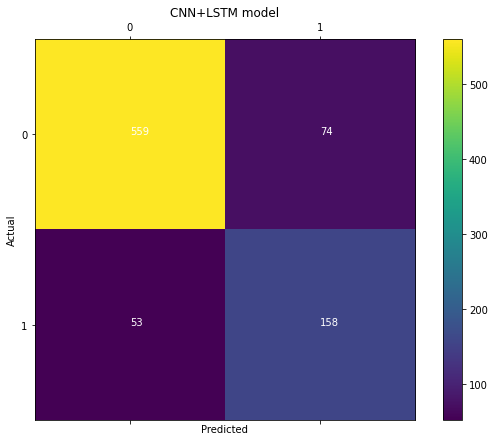

(4208, 480, 2)
(844, 480, 2)
Model: "model_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_9 (InputLayer)         [(None, 480, 2)]          0         
_________________________________________________________________
conv1d_24 (Conv1D)           (None, 480, 12)           84        
_________________________________________________________________
max_pooling1d_24 (MaxPooling (None, 160, 12)           0         
_________________________________________________________________
conv1d_25 (Conv1D)           (None, 160, 30)           1110      
_________________________________________________________________
max_pooling1d_25 (MaxPooling (None, 53, 30)            0         
_________________________________________________________________
conv1d_26 (Conv1D)           (None, 53, 64)            5824      
_________________________________________________________________
max_pooling1d_26 (MaxPooling (

211/211 [==============================] - 2s 10ms/step - loss: 0.0901 - accuracy: 0.9686
Epoch 62/100
211/211 [==============================] - 2s 10ms/step - loss: 0.0571 - accuracy: 0.9797
Epoch 63/100
211/211 [==============================] - 2s 10ms/step - loss: 0.0577 - accuracy: 0.9805
Epoch 64/100
211/211 [==============================] - 2s 10ms/step - loss: 0.0244 - accuracy: 0.9922
Epoch 65/100
211/211 [==============================] - 2s 10ms/step - loss: 0.0536 - accuracy: 0.9792
Epoch 66/100
211/211 [==============================] - 2s 10ms/step - loss: 0.0463 - accuracy: 0.9862
Epoch 67/100
211/211 [==============================] - 2s 10ms/step - loss: 0.0692 - accuracy: 0.9775
Epoch 68/100
211/211 [==============================] - 2s 10ms/step - loss: 0.0655 - accuracy: 0.9733
Epoch 69/100
211/211 [==============================] - 2s 10ms/step - loss: 0.0909 - accuracy: 0.9671
Epoch 70/100
211/211 [==============================] - 2s 10ms/step - loss: 0.0543 - 

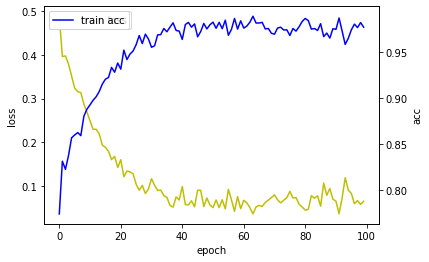

27/27 - 0s - loss: 0.2855 - accuracy: 0.9313
[[618  15]
 [ 43 168]]

 [633 211]
sensitivity :  0.7962085308056872
specificity :  0.976303317535545
frr :  0.2037914691943128
far :  0.023696682464454975


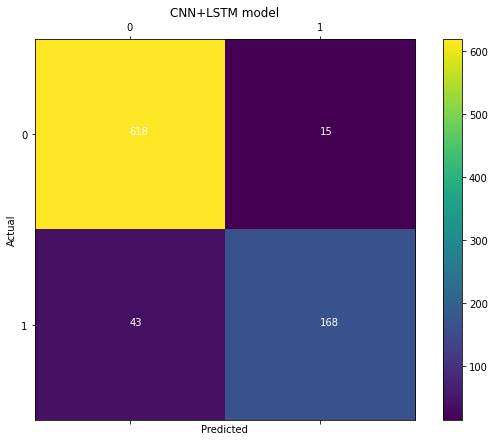

(4208, 480, 2)
(844, 480, 2)
Model: "model_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_10 (InputLayer)        [(None, 480, 2)]          0         
_________________________________________________________________
conv1d_27 (Conv1D)           (None, 480, 12)           84        
_________________________________________________________________
max_pooling1d_27 (MaxPooling (None, 160, 12)           0         
_________________________________________________________________
conv1d_28 (Conv1D)           (None, 160, 30)           1110      
_________________________________________________________________
max_pooling1d_28 (MaxPooling (None, 53, 30)            0         
_________________________________________________________________
conv1d_29 (Conv1D)           (None, 53, 64)            5824      
_________________________________________________________________
max_pooling1d_29 (MaxPooling (

211/211 [==============================] - 2s 10ms/step - loss: 0.0163 - accuracy: 0.9950
Epoch 62/100
211/211 [==============================] - 2s 10ms/step - loss: 0.0225 - accuracy: 0.9917
Epoch 63/100
211/211 [==============================] - 2s 10ms/step - loss: 0.0017 - accuracy: 0.9998
Epoch 64/100
211/211 [==============================] - 2s 10ms/step - loss: 9.6810e-04 - accuracy: 1.0000
Epoch 65/100
211/211 [==============================] - 2s 10ms/step - loss: 0.0100 - accuracy: 0.9974
Epoch 66/100
211/211 [==============================] - 2s 10ms/step - loss: 0.0197 - accuracy: 0.9932
Epoch 67/100
211/211 [==============================] - 2s 10ms/step - loss: 0.0322 - accuracy: 0.9920
Epoch 68/100
211/211 [==============================] - 2s 10ms/step - loss: 0.0165 - accuracy: 0.9933
Epoch 69/100
211/211 [==============================] - 2s 10ms/step - loss: 0.0110 - accuracy: 0.9967
Epoch 70/100
211/211 [==============================] - 2s 10ms/step - loss: 0.036

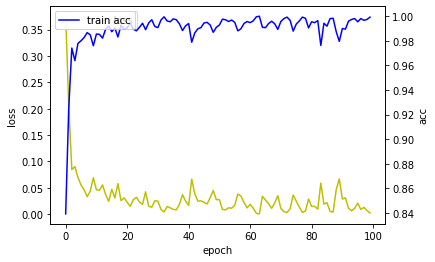

27/27 - 1s - loss: 0.0329 - accuracy: 0.9893
[[630   3]
 [  6 205]]

 [633 211]
sensitivity :  0.9715639810426541
specificity :  0.995260663507109
frr :  0.02843601895734597
far :  0.004739336492890996


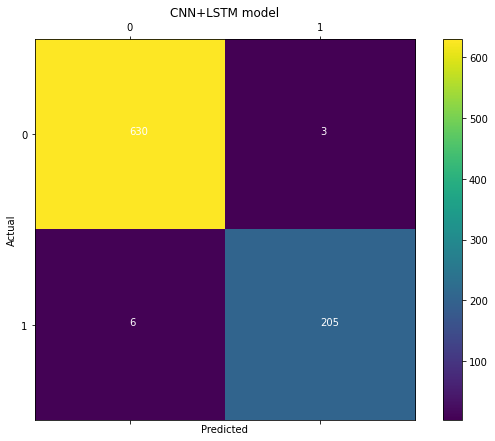

(4208, 480, 2)
(844, 480, 2)
Model: "model_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_11 (InputLayer)        [(None, 480, 2)]          0         
_________________________________________________________________
conv1d_30 (Conv1D)           (None, 480, 12)           84        
_________________________________________________________________
max_pooling1d_30 (MaxPooling (None, 160, 12)           0         
_________________________________________________________________
conv1d_31 (Conv1D)           (None, 160, 30)           1110      
_________________________________________________________________
max_pooling1d_31 (MaxPooling (None, 53, 30)            0         
_________________________________________________________________
conv1d_32 (Conv1D)           (None, 53, 64)            5824      
_________________________________________________________________
max_pooling1d_32 (MaxPooling 

211/211 [==============================] - 2s 9ms/step - loss: 0.0367 - accuracy: 0.9876
Epoch 62/100
211/211 [==============================] - 2s 9ms/step - loss: 0.0602 - accuracy: 0.9808
Epoch 63/100
211/211 [==============================] - 2s 9ms/step - loss: 0.0526 - accuracy: 0.9810
Epoch 64/100
211/211 [==============================] - 2s 10ms/step - loss: 0.0310 - accuracy: 0.9890
Epoch 65/100
211/211 [==============================] - 2s 9ms/step - loss: 0.0498 - accuracy: 0.9831
Epoch 66/100
211/211 [==============================] - 2s 10ms/step - loss: 0.0682 - accuracy: 0.9816
Epoch 67/100
211/211 [==============================] - 2s 9ms/step - loss: 0.0320 - accuracy: 0.9871
Epoch 68/100
211/211 [==============================] - 2s 9ms/step - loss: 0.0640 - accuracy: 0.9764
Epoch 69/100
211/211 [==============================] - 2s 9ms/step - loss: 0.0189 - accuracy: 0.9949
Epoch 70/100
211/211 [==============================] - 2s 10ms/step - loss: 0.0246 - accurac

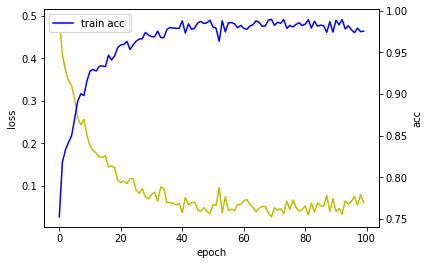

27/27 - 0s - loss: 0.1824 - accuracy: 0.9467
[[606  27]
 [ 18 193]]

 [633 211]
sensitivity :  0.9146919431279621
specificity :  0.957345971563981
frr :  0.08530805687203792
far :  0.04265402843601896


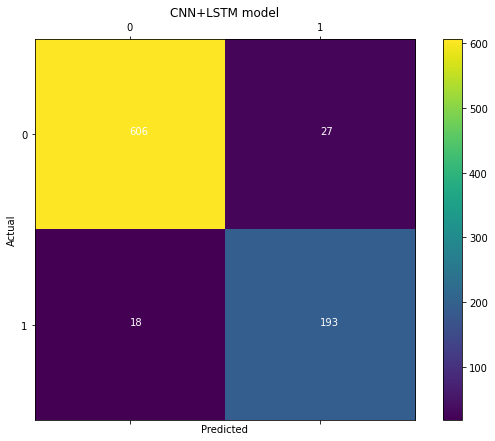

average_accuracy
0.916523044759577
average_sensitivity
0.8026712623869021
average_specificity
0.9544736464167743
average_frr
0.19732873761309785
average_far
0.045526353583225626


In [3]:
# 각 sub 마다 모델 학습

# train data를 sub:other = 1:3로 만들기
# 3초 덩어리 개수 1052 : 3156
# 315 * 4 + 316 * 6 = 3156

# test data를 sub:other = 1:3로 만들기
# 3초 덩어리 개수 211 : 633
# 63 * 7 + 64 * 3 = 633

for i in range(train_sub_cnt):
    cnt = 0
    train_data_n = train_data_each[i]
    test_data_n = test_data_each[i]
    
    for j in range(train_sub_cnt):
        if j != i and cnt < 4:
            cnt = cnt + 1
            train_data_n = np.append(train_data_n, np.array(random.sample(list(train_data_each[j]), 315)), axis = 0)
        elif j != i and cnt >= 4:
            train_data_n = np.append(train_data_n, np.array(random.sample(list(train_data_each[j]), 316)), axis = 0)
    
    cnt = 0
    
    for j in range(test_sub_cnt):
        if j != i and cnt < 7:
            cnt = cnt + 1
            test_data_n = np.append(test_data_n, np.array(random.sample(list(test_data_each[j]), 63)), axis = 0)
        elif j != i and cnt >= 7:
            test_data_n = np.append(test_data_n, np.array(random.sample(list(test_data_each[j]), 64)), axis = 0)
            
    print(train_data_n.shape)
    print(test_data_n.shape)
    
    train_label = np.zeros(4208)
    test_label = np.zeros(844)
    
    for j in range(len(train_label)):
        if (j < train_sub_size):
            train_label[j] = 1
            
    for j in range(len(test_label)):
        if (j < test_sub_size):
            test_label[j] = 1
 
    ################################################################
    # 모델 구성하기                                                #
    # 이진 분류이기 때문에 0~1 사이의 값을 나타내는 출력뉴런 1개   #
    ################################################################

    # Cnn 층
    inputs = tf.keras.Input(shape = (480, 2))

    layers = tf.keras.layers.Conv1D(filters = 12, kernel_size = 3, strides = 1, padding = 'same', activation  = 'relu')(inputs)
    layers = tf.keras.layers.MaxPool1D(3)(layers)

    layers = tf.keras.layers.Conv1D(filters = 30, kernel_size = 3, strides = 1, padding = 'same', activation  = 'relu')(layers)
    layers = tf.keras.layers.MaxPool1D(3)(layers)

    layers = tf.keras.layers.Conv1D(filters = 64, kernel_size = 3, strides = 1, padding = 'same', activation = 'relu')(layers)
    layers = tf.keras.layers.MaxPool1D(3)(layers)

    # LSTM 층
    layers = tf.keras.layers.LSTM(64)(layers)

    # Dense 층
    layers = tf.keras.layers.Dropout(0.3)(layers)
    layers = tf.keras.layers.Dense(128, activation='relu')(layers)
    # layers = tf.keras.layers.Dropout(0.01)(layers)
    layers = tf.keras.layers.Dense(64, activation='relu')(layers)
    # layers = tf.keras.layers.Dropout(0.05)(layers)
    layers = tf.keras.layers.Dense(1, activation='sigmoid')(layers)

    model = tf.keras.models.Model(inputs = inputs, outputs = layers)
    model.compile(loss= 'binary_crossentropy', optimizer= tf.keras.optimizers.Adam(0.005), metrics=['accuracy'])
    model.summary()
    
    early_stopping = tf.keras.callbacks.EarlyStopping(patience= 20)
    
#     # train 데이터를 train과 validation으로 분배
#     # validation 데이터를 여러 sub에서 가져갈 수 있도록 shuffle
#     x_train, x_val, y_train, y_val = train_test_split(train_data, train_label, test_size=0.1, shuffle=True, random_state=1)

    print('##########')
    print('# sub', i+1, ' #')
    print('##########')

    # 모델 돌리기
#     hist = model.fit(x_train, y_train, batch_size=40, epochs=200, validation_data=(x_val, y_val), verbose=1, callbacks= [early_stopping])
    hist = model.fit(train_data_n, train_label, batch_size=20, epochs=100, verbose=1)
    
    fig, loss_ax = plt.subplots()
    acc_ax = loss_ax.twinx()
    
    loss_ax.plot(hist.history['loss'], 'y', label = 'train loss')
    loss_ax.set_xlabel('epoch')
    loss_ax.set_ylabel('loss')
    loss_ax.legend(loc='upper left')
    
    
    acc_ax.plot(hist.history['accuracy'], 'b', label = 'train acc')
    acc_ax.set_ylabel('acc')
    acc_ax.legend(loc='upper left')
    
    plt.show()
    
    if i < 10 :
        model_name = 'model/Sub_Model_0'+str(i+1)+'.h5'
    else :
        model_name = 'model/Sub_Model_'+str(i+1)+'.h5'

    # save model
    model.save(model_name)
    
    test_loss, test_acc = model.evaluate(test_data_n, test_label, verbose= 2)
    test_pred = model.predict(test_data_n)
    
    test_loss_all.append(test_loss)
    test_acc_all.append(test_acc)
    
    # 확률이 0.5이상이면 자신(1), 작으면 타인(0)
    for i in range(len(test_pred)):
        if(0.5 <= test_pred[i]):
            test_pred[i] = 1

        else:
            test_pred[i] = 0
            
            
    test_pre_all.append(test_pred)
    
    # confusion matrix 생성
    conf_matrix = confusion_matrix(test_label, test_pred)
    
    #############################################################
    #       conf_matrix[0][0] = TN      conf_matrix[0][1] = FP  #
    #       conf_matrix[1][0] = FN      conf_matrix[1][1] = TP  #
    #############################################################

    print(conf_matrix)
    conf_mat_all.append(conf_matrix)

    # sum 이용 각 행 더하기
    row = conf_matrix.sum(axis=1)
    print('\n', row)

    # row[0] = spec의 분모, row[1] = sens의 분모

    test_sensitivity = conf_matrix[1][1] / row[1]
    test_specificity = conf_matrix[0][0] / row[0]
    
    test_frr = conf_matrix[1][0] / (conf_matrix[1][1]+conf_matrix[1][0])
    test_far = conf_matrix[0][1] / (conf_matrix[0][1]+conf_matrix[0][0])

    print('sensitivity : ', test_sensitivity)
    print('specificity : ', test_specificity) 
    print('frr : ', test_frr)
    print('far : ', test_far) 
    
    test_sen_all.append(test_sensitivity)
    test_spe_all.append(test_specificity)
    frr_all.append(test_frr)
    far_all.append(test_far)
    
    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_subplot(111)

    cax = ax.matshow(conf_matrix)

    fig.colorbar(cax)

    for i, j in itertools.product(range(conf_matrix.shape[0]), range(conf_matrix.shape[1])):
        plt.text(j, i, conf_matrix[i, j], color="white")

    plt.title('CNN+LSTM model')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')

    plt.show()
    
print('average_accuracy')
print(np.mean(test_acc_all))
print('average_sensitivity')
print(np.mean(test_sen_all))
print('average_specificity')
print(np.mean(test_spe_all))
print('average_frr')
print(np.mean(frr_all))
print('average_far')
print(np.mean(far_all))